In [36]:
from google.colab import drive

In [37]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
import pandas as pd
import numpy as np

In [39]:
stock = pd.read_csv("/content/drive/My Drive/DHV/microsoft_stocks.csv", sep = ",")

In [40]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1925 entries, 0 to 1924
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1925 non-null   object 
 1   High       1925 non-null   float64
 2   Low        1925 non-null   float64
 3   Open       1925 non-null   float64
 4   Close      1925 non-null   float64
 5   Volume     1925 non-null   float64
 6   Adj Close  1925 non-null   float64
dtypes: float64(6), object(1)
memory usage: 105.4+ KB


In [41]:
stock.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1925.000000,1925.000000,1925.000000,1925.000000,1.925000e+03,1925.000000
mean,140.301455,137.482982,138.934888,138.967096,3.009687e+07,134.947514
std,89.000722,87.030367,88.066413,88.062951,1.397862e+07,89.136791
min,40.740002,39.720001,40.340000,40.290001,7.425600e+06,35.359890
25%,61.410000,60.810001,61.009998,61.119999,2.150010e+07,56.459160
50%,108.739998,106.290001,107.860001,107.639999,2.669610e+07,102.966743
75%,215.000000,210.360001,213.100006,212.830002,3.426400e+07,209.119339
max,349.670013,342.200012,344.619995,343.109985,1.691640e+08,340.882812


In [42]:
stock['High'].max()

349.6700134277344

All time high as per the data given is around 350 dollars

In [43]:
stock['Low'].min()

39.720001220703125

All time low as per the data given is around 40 dollars

In [44]:
import matplotlib.pyplot as plt

In [45]:
x = stock['Date']
y = stock['Close']

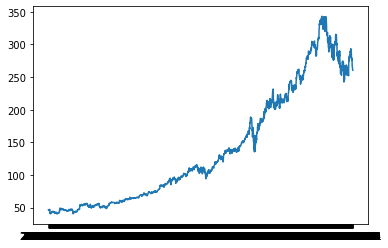

In [46]:
plt.plot(x,y)

From this we can see that the chart has gone up significantly since the listing but reccently has seen some corrections in the price

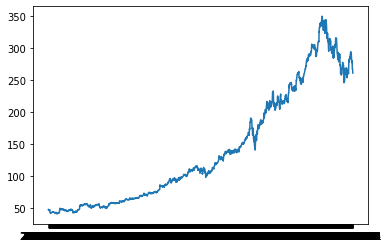

In [47]:
y = stock['High']
plt.plot(x,y)

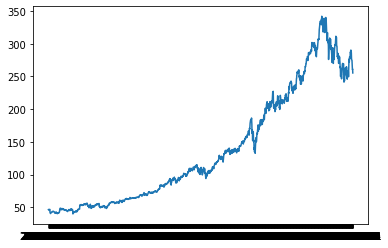

In [48]:
y = stock['Low']
plt.plot(x,y)

From above two graphs we can see that the stock is making higher highs and higher lows which confirms that the stock is in uptrend

In [49]:
stock['Date']= pd.to_datetime(stock['Date'])
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1925 entries, 0 to 1924
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1925 non-null   datetime64[ns]
 1   High       1925 non-null   float64       
 2   Low        1925 non-null   float64       
 3   Open       1925 non-null   float64       
 4   Close      1925 non-null   float64       
 5   Volume     1925 non-null   float64       
 6   Adj Close  1925 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 105.4 KB


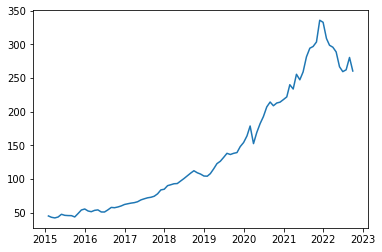

In [59]:
plt.plot(stock.groupby(pd.Grouper(key='Date',freq='M')).agg({'Close':'mean'}))

This is the monthly closing prices plotted which suggests that the stock was clearly in uptrend till mid 2021 but since then it has started its downward journey so buying at current levels is not recommended unless some signs of trend reversals are seen.

In [66]:
stock['IntradayMove'] = stock['High'] - stock['Low']

In [67]:
stock

,Date,High,Low,Open,Close,Volume,Adj Close,IntradayMove
0,2015-01-12,47.540001,46.360001,47.419998,46.599998,23651900.0,40.786396,1.180000
1,2015-01-13,47.910000,46.060001,46.970001,46.360001,35270600.0,40.576340,1.849998
2,2015-01-14,46.240002,45.619999,45.959999,45.959999,29719600.0,40.226257,0.620003
3,2015-01-15,46.380001,45.410000,46.220001,45.480000,32750800.0,39.806129,0.970001
4,2015-01-16,46.279999,45.169998,45.310001,46.240002,35695300.0,40.471313,1.110001
...,...,...,...,...,...,...,...,...
1920,2022-08-26,280.339996,267.980011,279.079987,268.089996,27549300.0,268.089996,12.359985
1921,2022-08-29,267.399994,263.850006,265.850006,265.230011,20338500.0,265.230011,3.549988
1922,2022-08-30,267.049988,260.660004,266.670013,262.970001,22767100.0,262.970001,6.389984
1923,2022-08-31,267.109985,261.329987,265.390015,261.470001,24791800.0,261.470001,5.779999


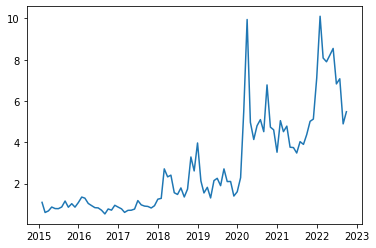

In [68]:
plt.plot(stock.groupby(pd.Grouper(key='Date',freq='M')).agg({'IntradayMove':'mean'}))

This chart gives us an idea of the volatility of the stock by calculing the trend of intraday move of the stock from this we can observe that the volatility in the stock was at peak during start of 2020 quiet evident it was due to covid effect on the wall streets and again the volatility rose in the end 2021 which was evident due to rising inflation.

Also if we compare the volatility graph with price graph we can see the points where the volatility increased the price has fallen significantky so the volatility gives us the idea of fear in the marketing checking which could save us from huge losses.

Text(0.5, 1.0, 'Intraday Move/Volatility')

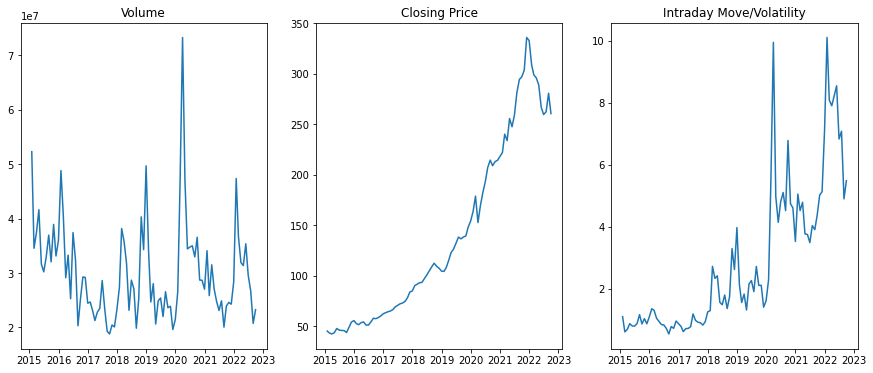

In [86]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(6)
plt.subplot(1, 3, 1) 
plt.plot(stock.groupby(pd.Grouper(key='Date',freq='M')).agg({'Volume':'mean'}))
plt.title('Volume')
plt.subplot(1, 3, 2)
plt.plot(stock.groupby(pd.Grouper(key='Date',freq='M')).agg({'Close':'mean'}))
plt.title('Closing Price')
plt.subplot(1, 3, 3)
plt.plot(stock.groupby(pd.Grouper(key='Date',freq='M')).agg({'IntradayMove':'mean'}))
plt.title('Intraday Move/Volatility')


From above three graphs we can see that whenever volume spike occurs there is corresponding volatility incurring in the stock the stock starts making more moves in intraday and at the same time a big move in price either side is seen.

So by analysizing these three parameters Volume, Closing Price variation, volatility a lot of inferences can be made.